In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import HTML, display
import ipywidgets as widgets

from scipy import signal

from difflib import get_close_matches

In [2]:
feat_folder = '/share/data/temp/daniel/20200211_tierpsy_features/'
(_,_,filenames) = next(os.walk(feat_folder))

In [3]:
df_data = pd.read_pickle('/share/data/temp/daniel/20200211_tierpsy_features/12n_20180709_102900_1_15m0s_None_None_None_features_JDA.pickle')

In [4]:
slider_frame = widgets.IntRangeSlider(value=[0, 500], min=0, max=len(df_data)-1,
                                     continuous_update=False)

@widgets.interact
def plot_speeds(ind_frame = slider_frame):
    
    start_frame, end_frame = ind_frame
    fig, axes = plt.subplots(2,1,figsize=(20,10))

    axes[0].plot(df_data['speed_all'][start_frame:end_frame])
    axes[0].plot(df_data['speed_tail_tip'][start_frame:end_frame], alpha=0.5)

    axes[1].plot(df_data['speed_all'][start_frame:end_frame], alpha=0.5)
    axes[1].plot(df_data['speed_head_base'][start_frame:end_frame], alpha=0.5)
    axes[1].plot(df_data['speed_head_tip'][start_frame:end_frame], alpha=0.5)

interactive(children=(IntRangeSlider(value=(0, 500), continuous_update=False, description='ind_frame', max=269…

In [5]:
slider_frame = widgets.IntRangeSlider(value=[0, 500], min=0, max=len(df_data)-1,
                                     continuous_update=False)

@widgets.interact
def plot_speeds(ind_frame = slider_frame):
    
    start_frame, end_frame = ind_frame
    fig, axes = plt.subplots(2,1,figsize=(20,10))
    x_range = np.arange(start_frame,end_frame)
    x_range_in_sec = x_range/30
    axes[0].plot(x_range_in_sec,df_data['speed_tail_tip'][start_frame:end_frame])
    axes[1].plot(df_data['angular_velocity_head_tip'][start_frame:end_frame], alpha=0.5)

   

interactive(children=(IntRangeSlider(value=(0, 500), continuous_update=False, description='ind_frame', max=269…

## Wavelet analysis

#### Peak detection
- Maybe for efficient peak detection (and hence defining roaming and dwelling), wavelets could be used. 

In [6]:
peakind = signal.find_peaks_cwt(df_data['angular_velocity_head_tip'], np.arange(10,55))

/share/python-virtual-environments/ciona_behaviour/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:77: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, plus)
/share/python-virtual-environments/ciona_behaviour/lib/python3.6/site-packages/scipy/signal/_peak_finding.py:78: RuntimeWarning: invalid value encountered in greater
  results &= comparator(main, minus)


In [7]:
time_peaks = ['{:f}'.format(t/30) for t in peakind]
len(time_peaks)

222

In [8]:
wavelet_transform = signal.cwt(df_data['speed_tail_tip'], signal.ricker, np.arange(1,35))

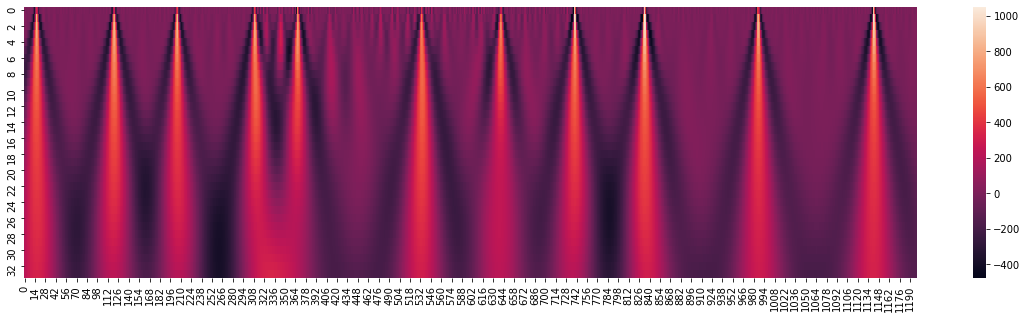

In [9]:
fig, axes = plt.subplots(1,1,figsize=(20,5))
sns.heatmap(wavelet_transform[:,0:1200],ax=axes)

In [10]:
len(peakind[peakind < 1200])

11

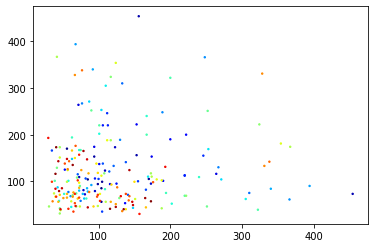

In [11]:
ipi = np.diff(peakind)
plt.scatter(ipi[:-1],ipi[1:], s=2, cmap='jet', c=np.arange(0,len(ipi)-1))

In [104]:
(456400/12)*0.73*(1+(23/30))

49050.322222222225